In [2]:
import copy
import os
import time
import warnings

import aprofiles as apro
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr


In [23]:
## Work on A-Profiles

pbl   : 100%|██████████| 285/285 [00:00<00:00, 1734.52it/s]


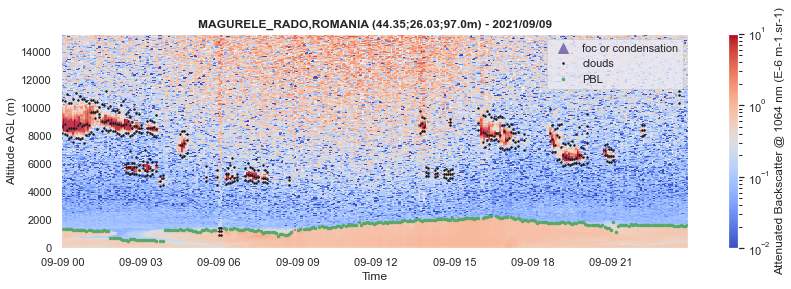

In [29]:
path = "examples/data/E-PROFILE/L2_0-20000-001492_A20210909.nc"
path = "data/e-profile/2021/09/09/L2_0-20008-0INO_B20210909.nc"

apro_reader = apro.reader.ReadProfiles(path)
profiles = apro_reader.read()

# extrapolation lowest layers
profiles.extrapolate_below(z=150, inplace=True)

# detection
profiles.foc(zmin_cloud=200)
profiles.clouds(zmin=300, thr_noise=5, thr_clouds=4, verbose=True)
profiles.pbl(zmin=200, zmax=3000, under_clouds=False, min_snr=1., verbose=True)

# plot image
profiles.plot(zref='agl', show_foc=True, show_clouds=True, show_pbl=True, log=True, vmin=1e-2, vmax=1e1)

In [22]:
## Work on A-Profiles output

In [3]:
BASE_DIR_OUT = "data/v-profiles"
date = "2021-09-09"
yyyy = date.split("-")[0]
mm = date.split("-")[1]
dd = date.split("-")[2]


In [4]:
datepath = os.path.join(BASE_DIR_OUT, yyyy, mm, dd)
onlyfiles = [f for f in os.listdir(datepath) if os.path.isfile(os.path.join(datepath, f))]

In [5]:
matching_index = [i for i, s in enumerate(onlyfiles) if "0-20000-0-01010" in s][0]

In [6]:
filename = onlyfiles[matching_index]
ds = xr.open_dataset(os.path.join(datepath, filename), decode_times=True)

In [18]:
a = np.bool_

In [21]:
bool

bool